In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMXV.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

        ID_CIDERH REGION   FECHA_RBE  TEMP_MEDIA_RBE     LAT_Y      LON_X
0      M_001_A_XV     XV  1985-01-01       17.200000 -18.83571 -69.745881
1      M_001_A_XV     XV  1985-01-02       19.400000 -18.83571 -69.745881
2      M_001_A_XV     XV  1985-01-03       19.500000 -18.83571 -69.745881
3      M_001_A_XV     XV  1985-01-04       18.900000 -18.83571 -69.745881
4      M_001_A_XV     XV  1985-01-05       16.500000 -18.83571 -69.745881
...           ...    ...         ...             ...       ...        ...
93531    M_201_AA     XV  2010-08-12       15.265217 -18.46700 -70.167000
93532    M_201_AA     XV  2010-08-15       14.241667 -18.46700 -70.167000
93533    M_201_AA     XV  2010-08-27       15.325000 -18.46700 -70.167000
93534    M_202_AA     XV  2006-05-27       19.183333 -18.47000 -70.170000
93535    M_194_AA     XV  1990-12-17       20.000000 -18.33300 -70.333000

[93536 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizTMXV.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['TEMP_MEDIA_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTMXV.csv', index=False)

archivo_csv2 = "VMTMXV.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

      M_001_A_XV  M_001_B_XV  M_006_A_XV  M_007_A_XV  M_009_A_XV  M_010_A_XV  \
0         17.200        21.5        4.25        10.0        12.7         3.3   
1         19.400        21.3        3.40         9.8        13.0         4.9   
2         19.500        21.9        1.60        10.5        13.5         3.8   
3         18.900        22.4        2.30         8.8        14.8         4.9   
4         16.500        22.2        1.50         7.5        15.6         4.8   
...          ...         ...         ...         ...         ...         ...   
9431      19.700        17.6         NaN         NaN         NaN         NaN   
9432      20.400        17.8         NaN         NaN         NaN         NaN   
9433      18.800        17.6         NaN         NaN         NaN         NaN   
9434      17.500        18.3         NaN         NaN         NaN         NaN   
9435      15.855        17.2         NaN         NaN         NaN         NaN   

      M_015_A_XV  M_016_A_XV  M_020_A_X

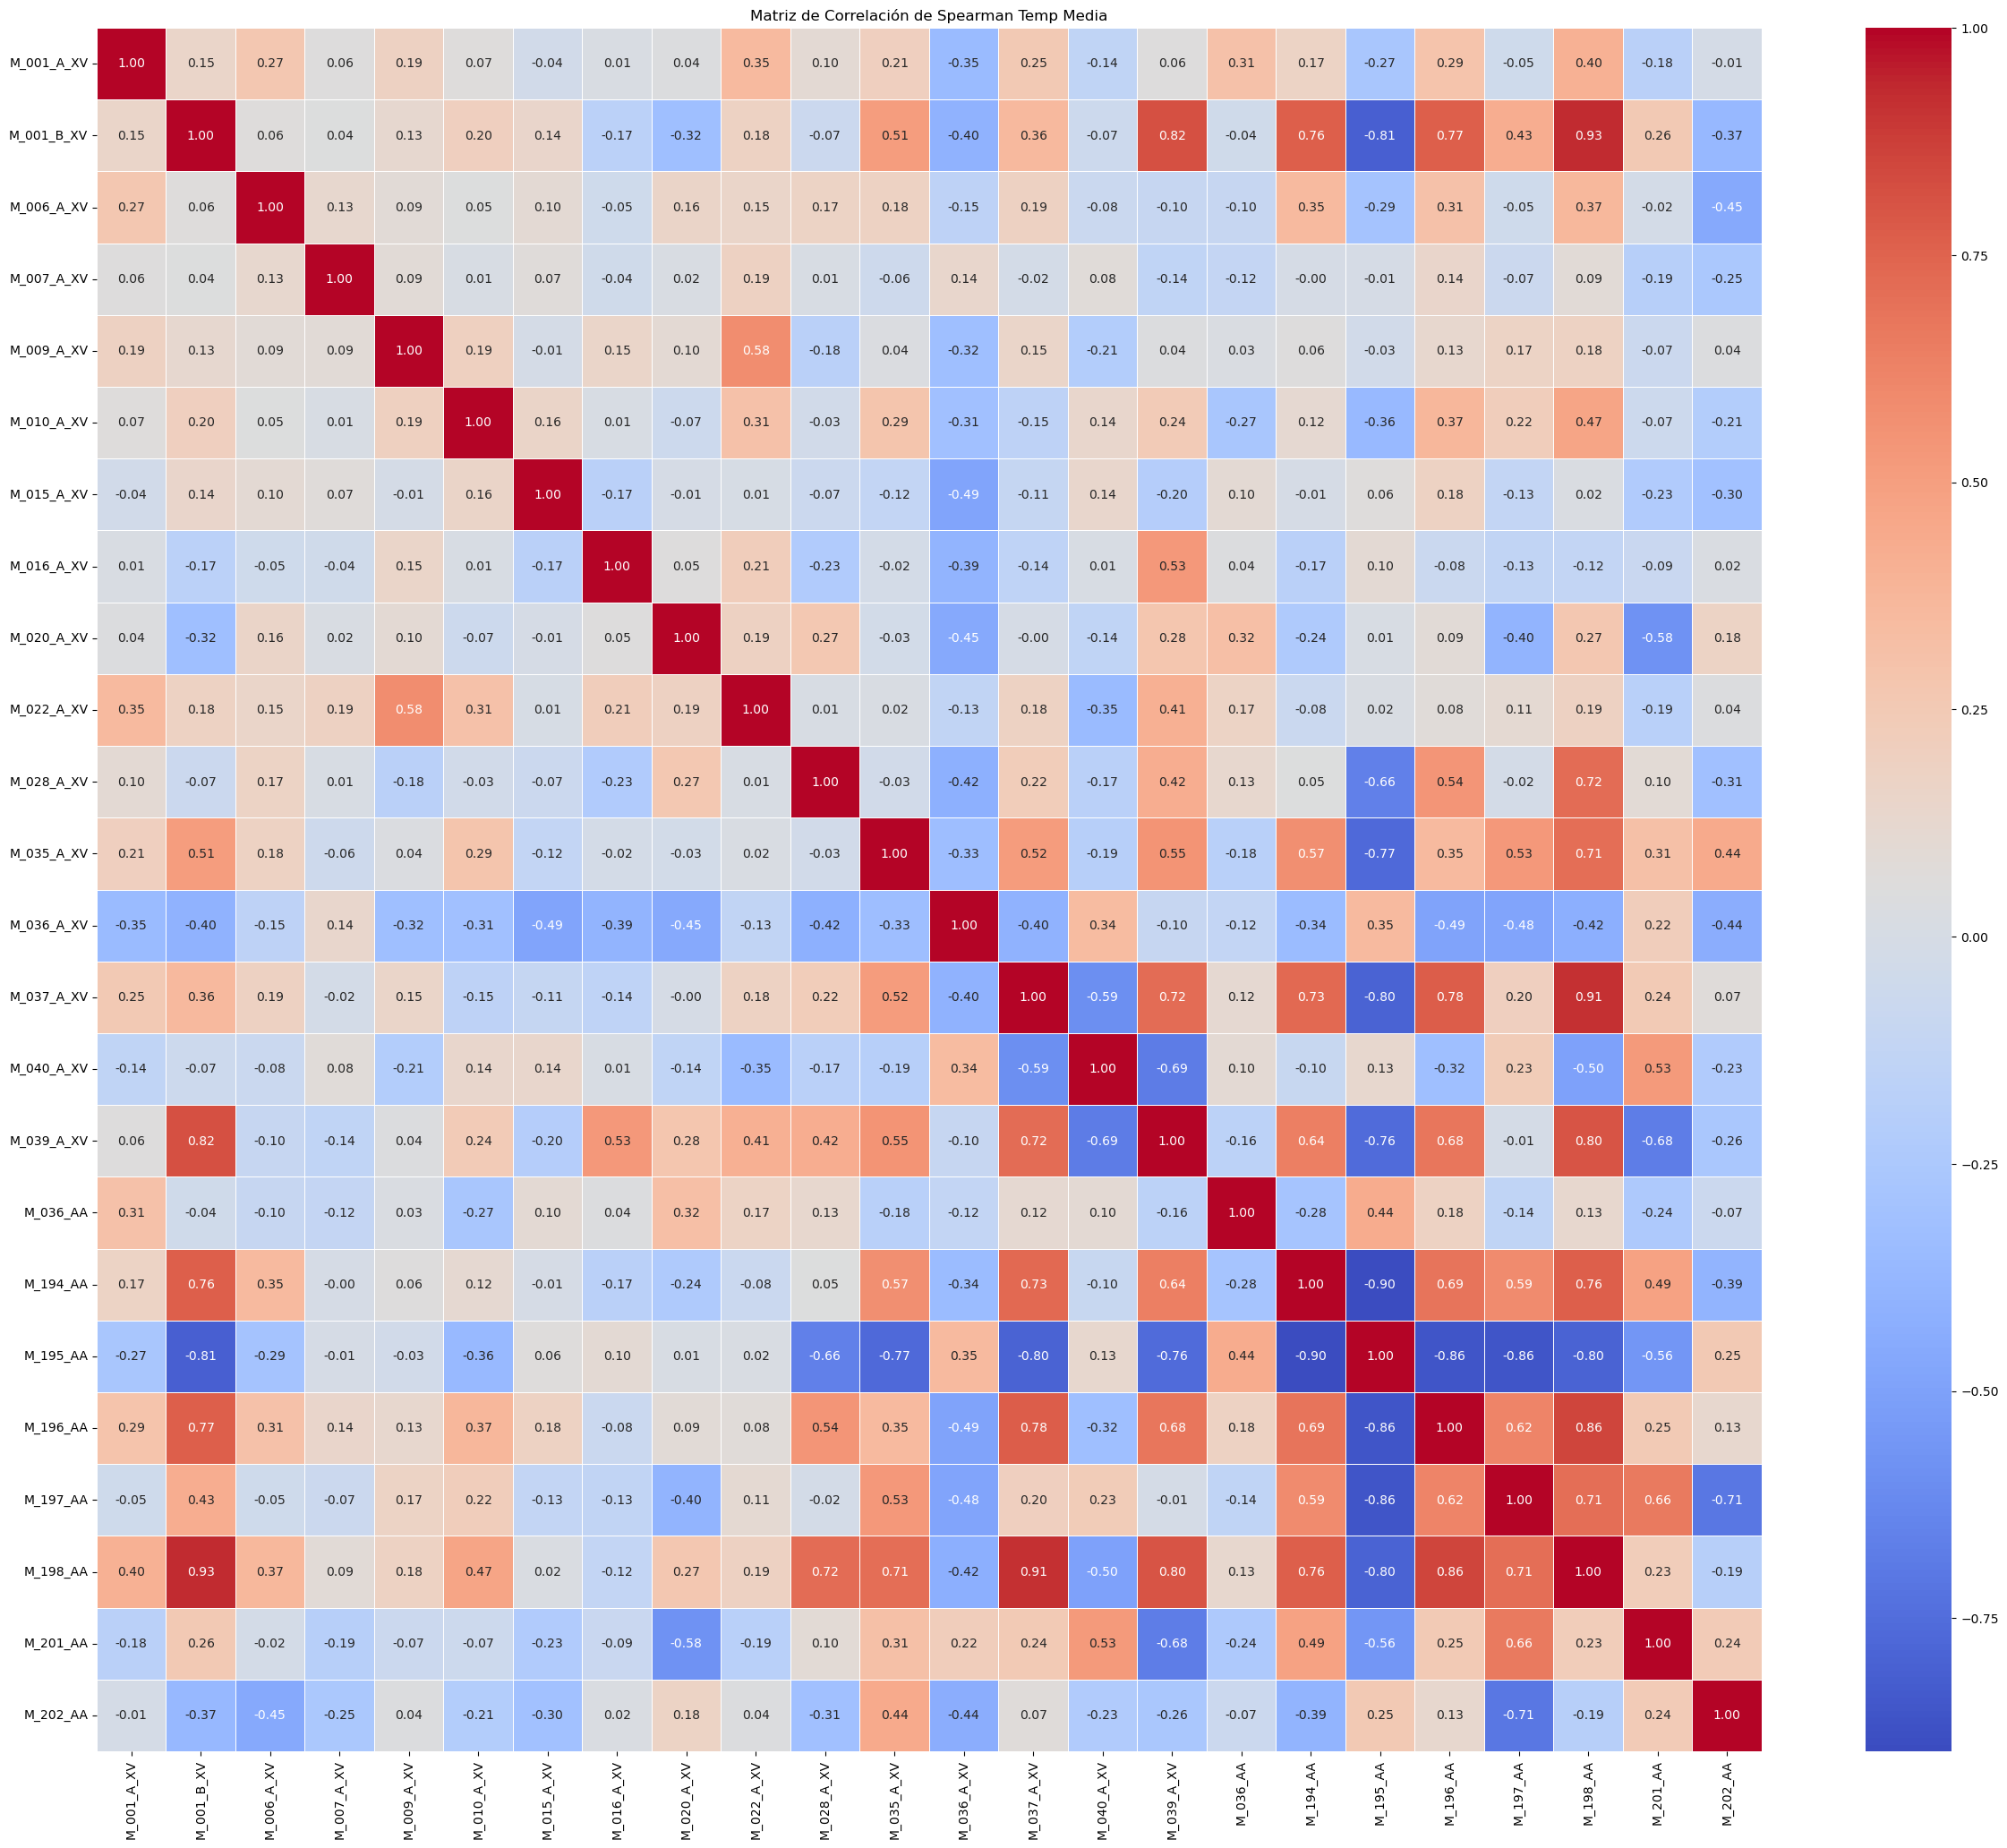

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Media")
plt.show()

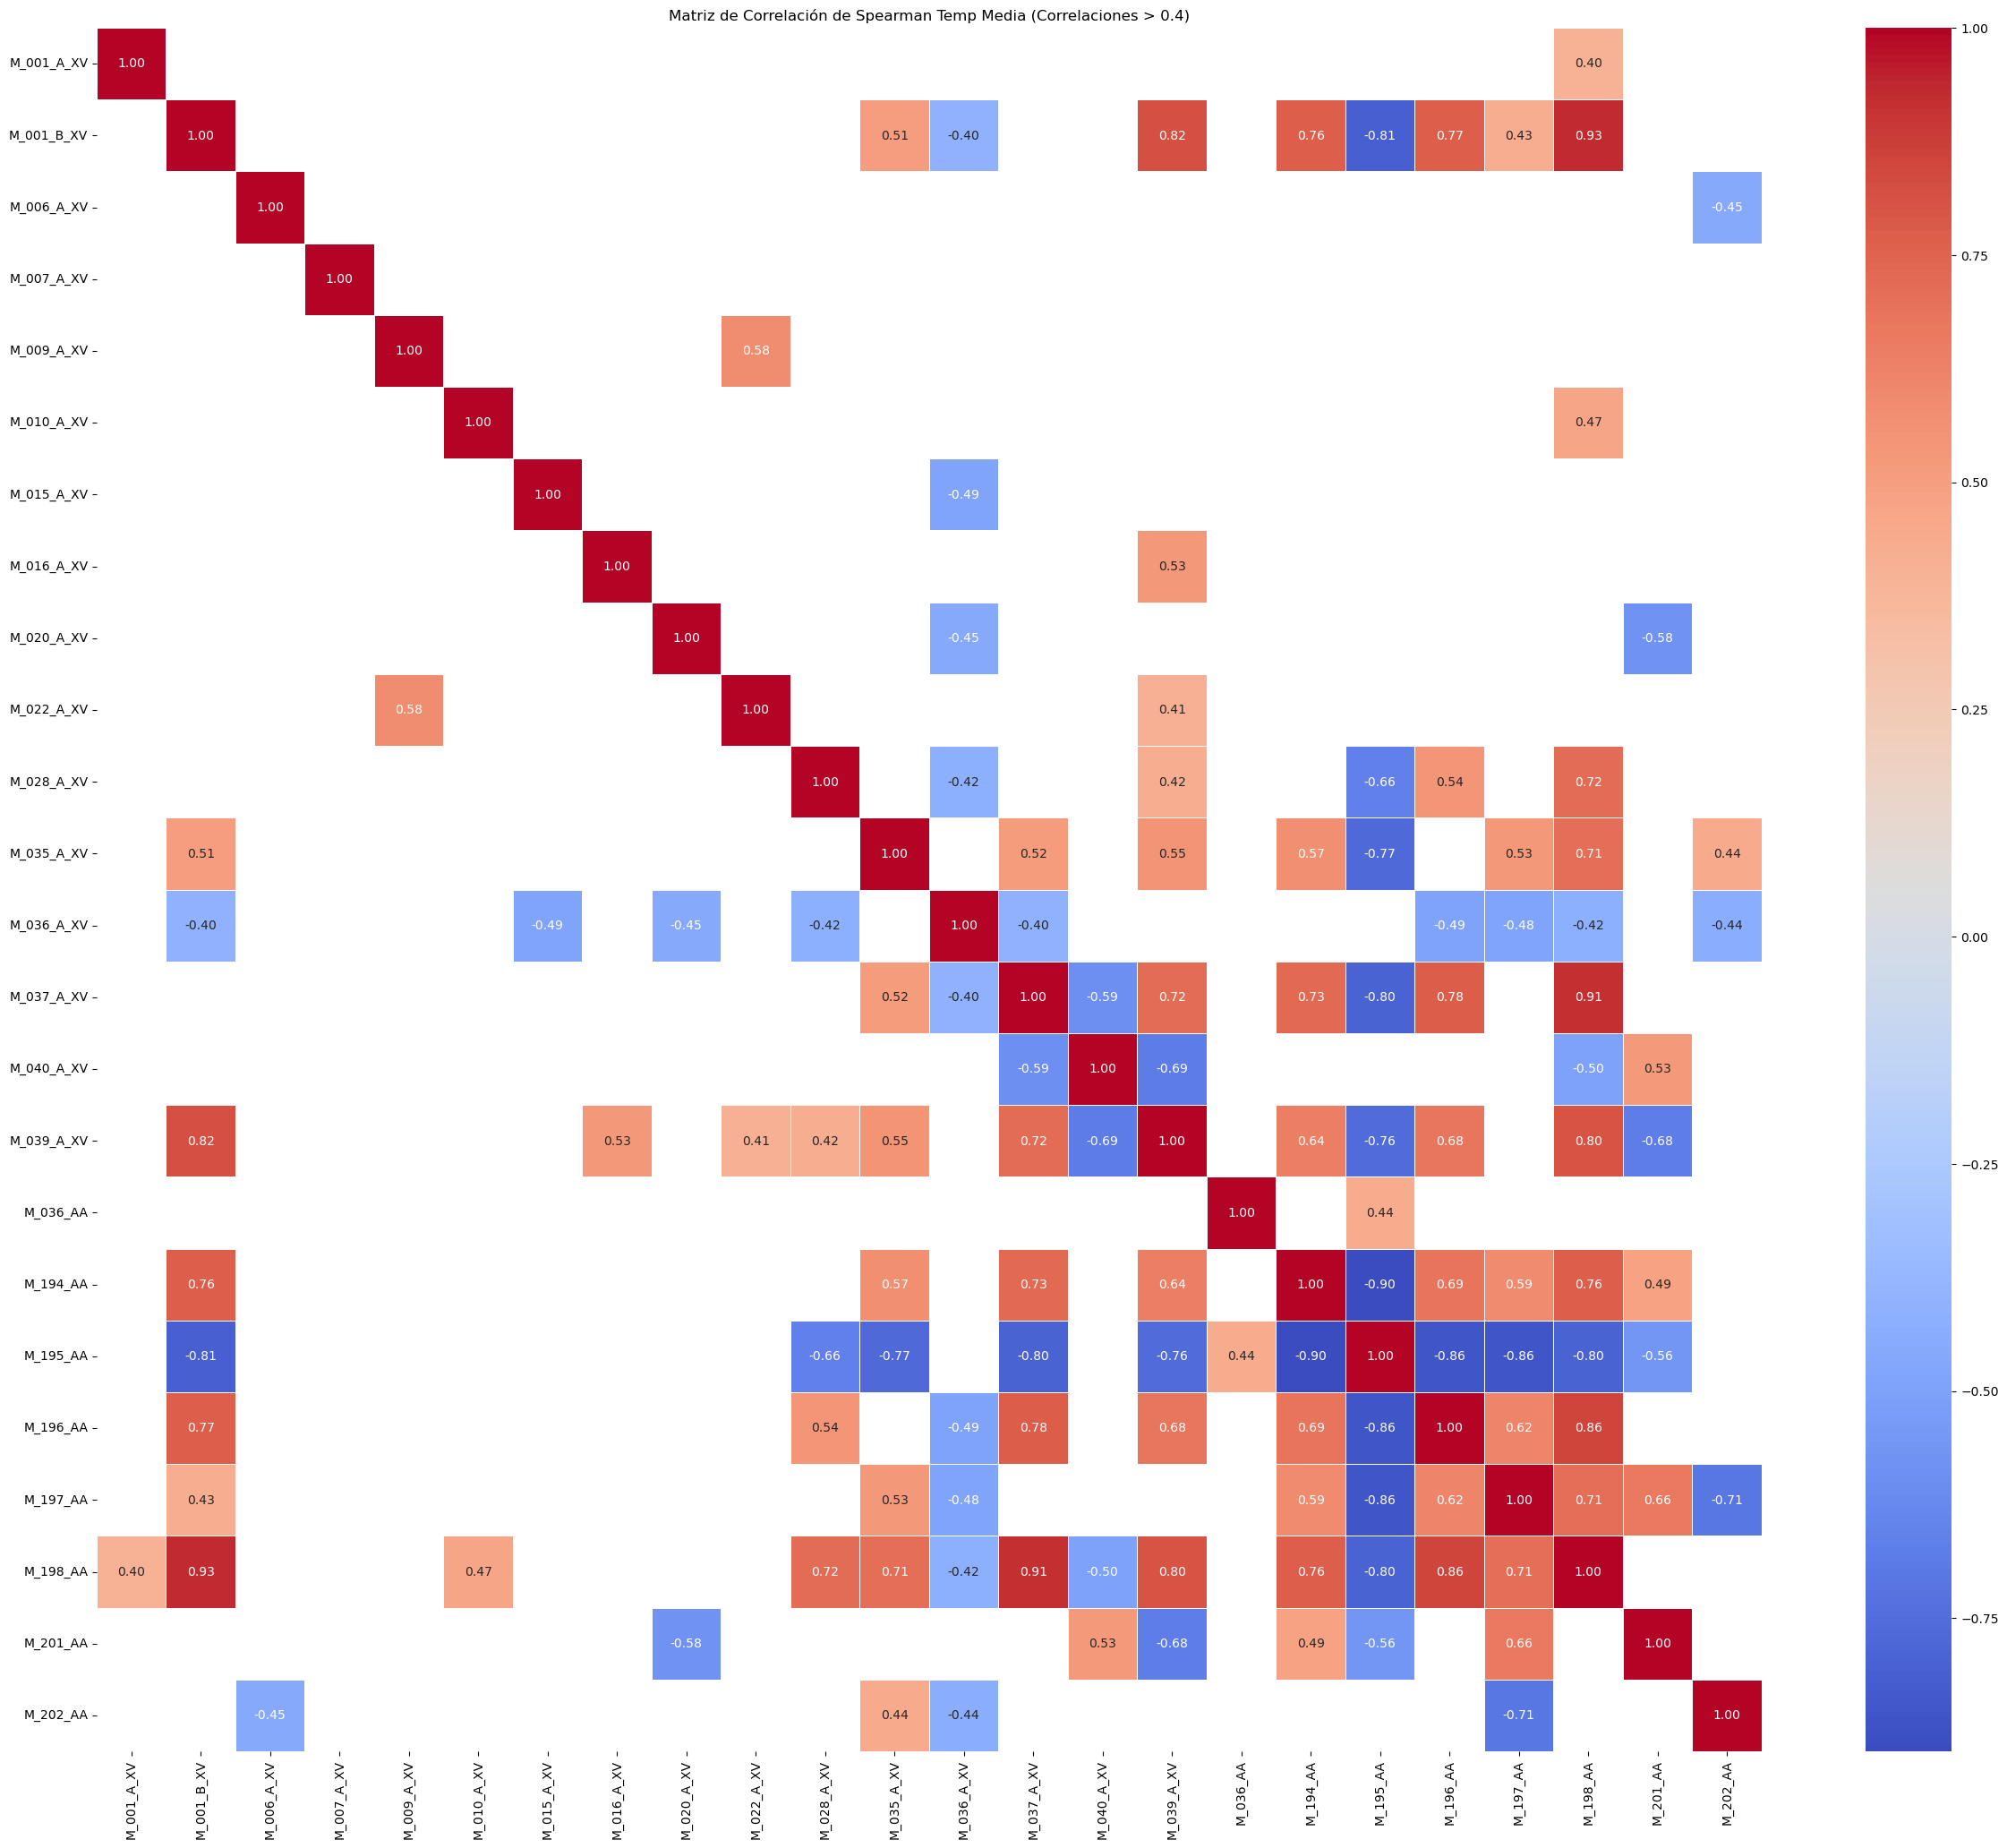

In [5]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Media (Correlaciones > 0.4)")
plt.show()

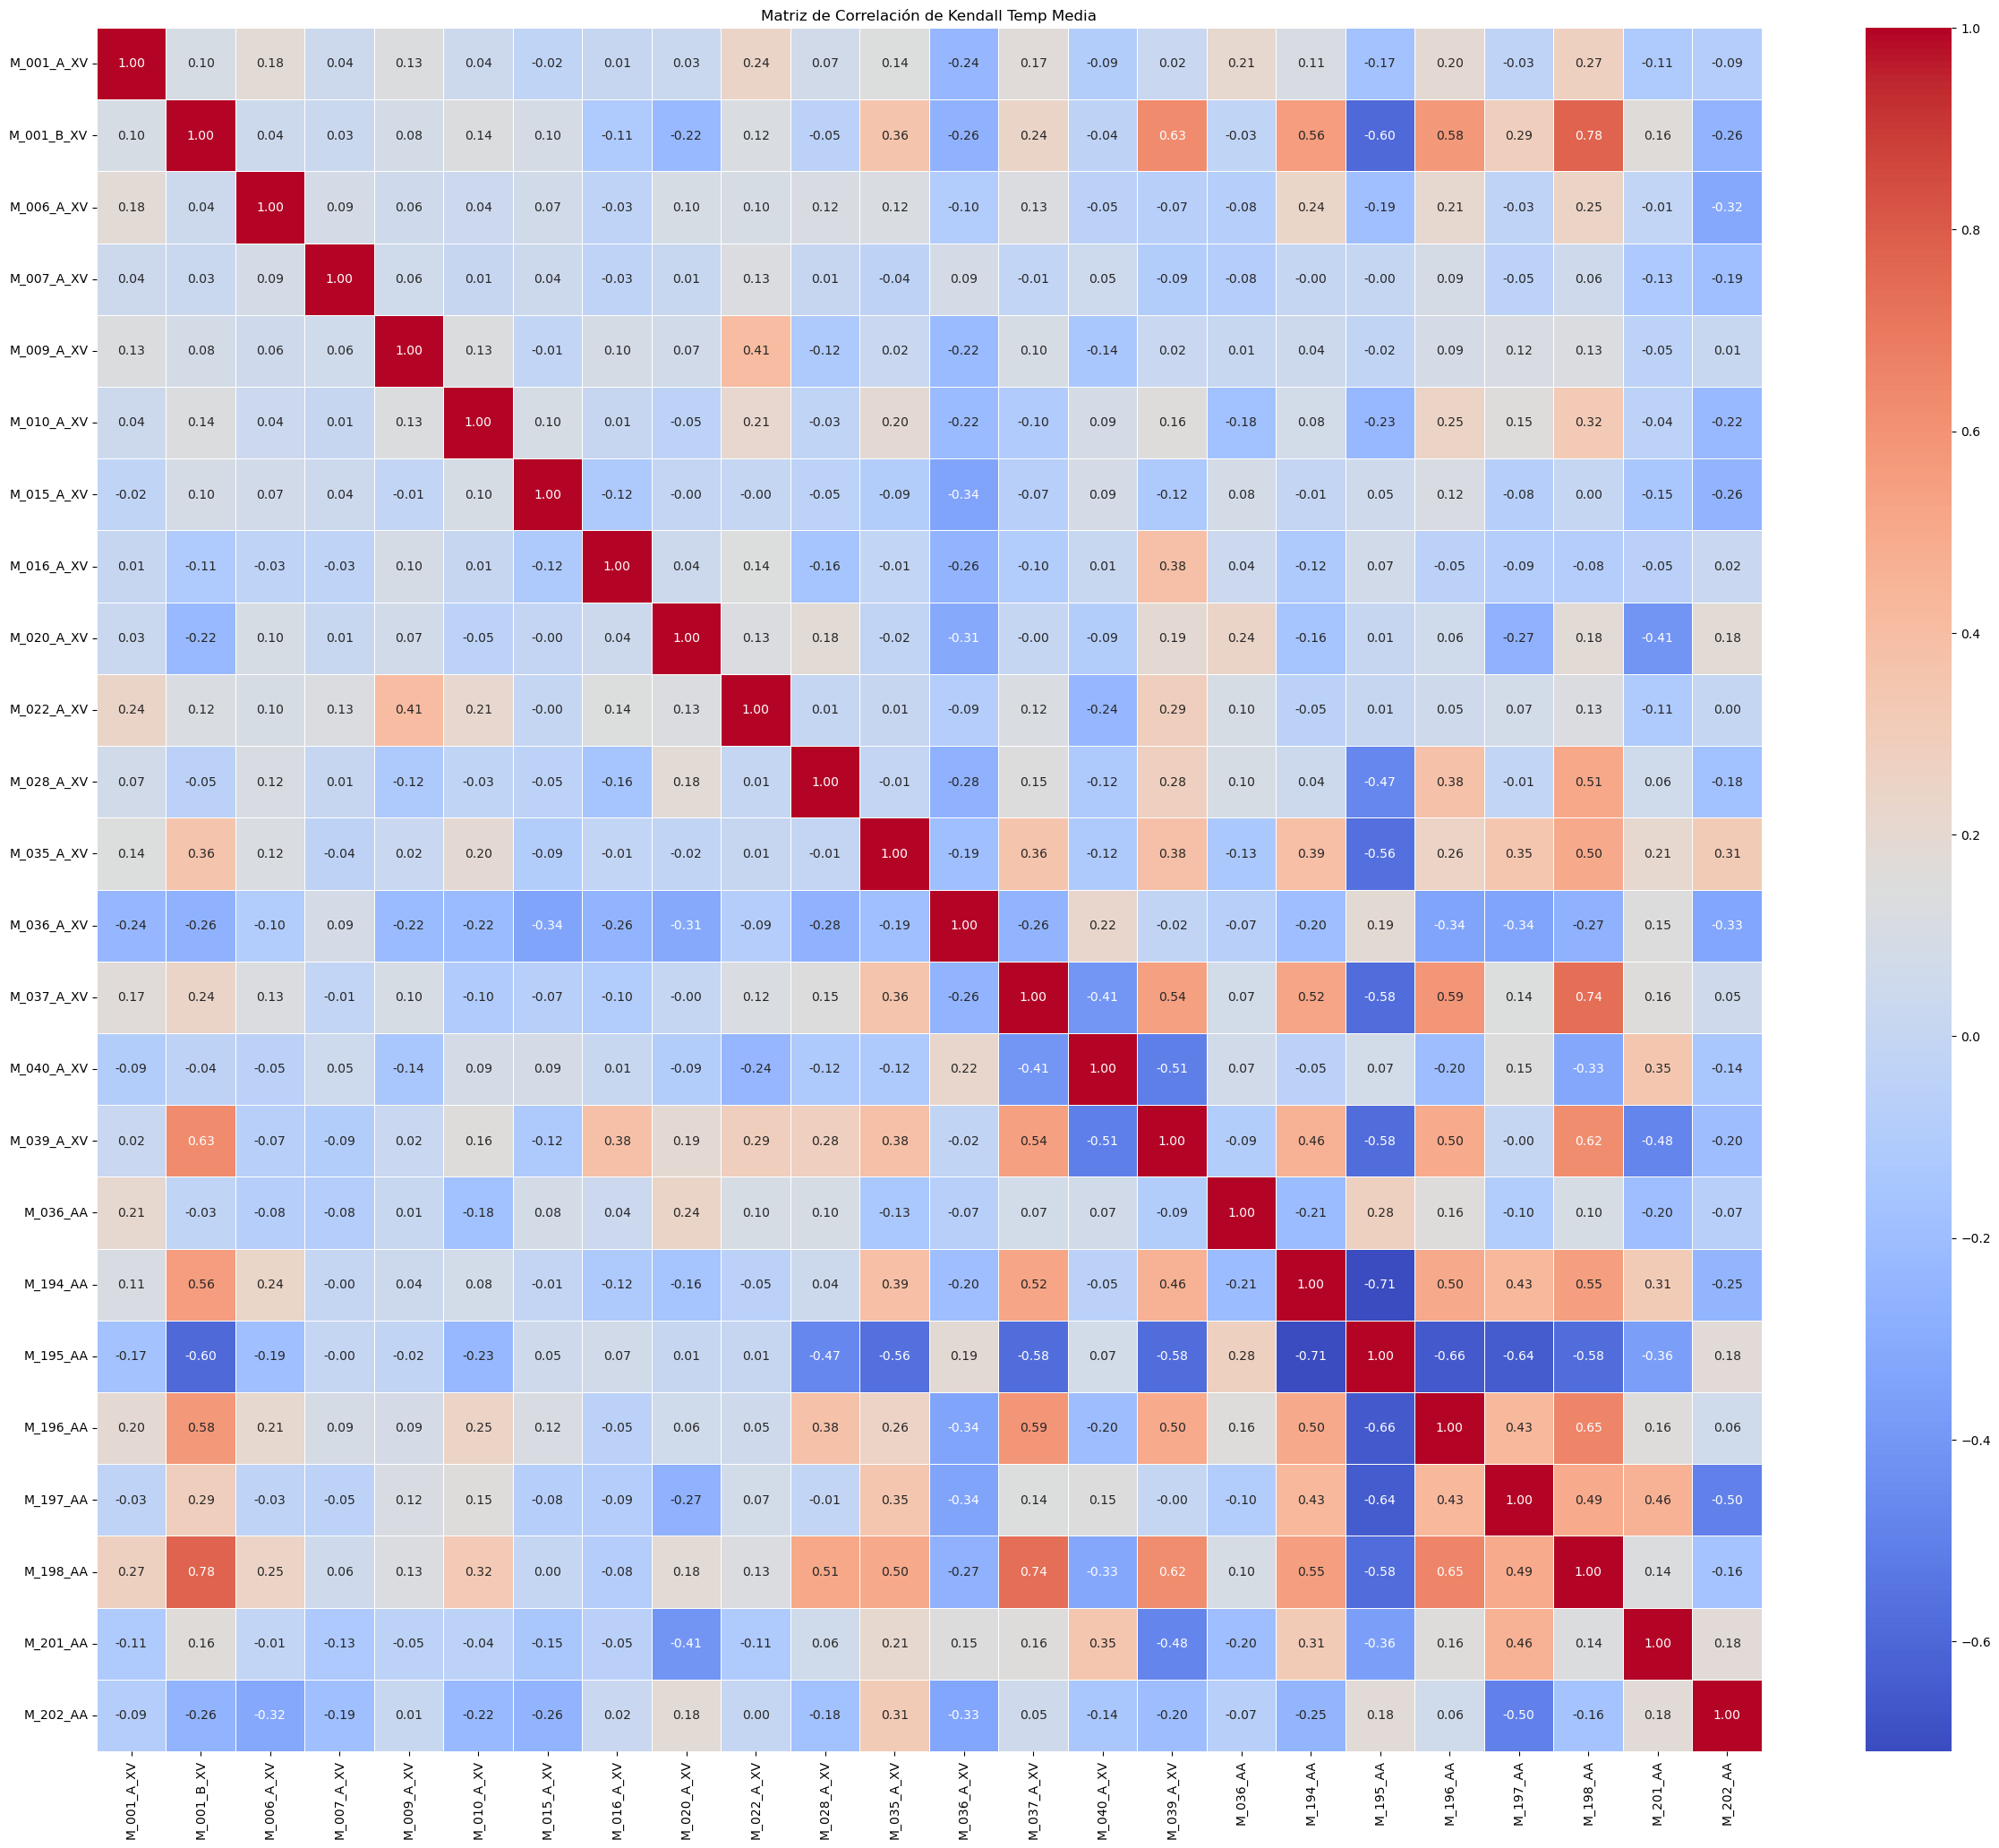

In [4]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall Temp Media")
plt.show()

In [4]:
import pandas as pd
from scipy.stats import spearmanr

archivo_csv = "MatrizTMXV.csv"
datos = pd.read_csv(archivo_csv)

# Lista de estaciones específicas
estaciones_especificas = ['M_001_B_XV', 'M_040_A_XV', 'M_037_A_XV', 'M_001_A_XV']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MEDIA_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman para Temperaturas Mínimas')
plt.show()

ID_CIDERH   M_001_A_XV  M_001_B_XV  M_037_A_XV  M_040_A_XV
ID_CIDERH                                                 
M_001_A_XV    1.000000    0.506144    0.515017    0.474385
M_001_B_XV    0.506144    1.000000    0.949887    0.905392
M_037_A_XV    0.515017    0.949887    1.000000    0.900085
M_040_A_XV    0.474385    0.905392    0.900085    1.000000


NameError: name 'sns' is not defined

In [3]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizTMXV.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_XV.html')